In [4]:
import detector
import scanner
import cv2 as cv
import numpy as np

def imshow(image):
    ww = 1024
    h, w = image.shape[:2]

    if w > ww:
        hh = int(ww / w * h)
        image = cv.resize(image, dsize=[ww, hh])

    _, ret = cv.imencode('.jpg', image) 

    from IPython.display import display, Image
    display(Image(data=ret))
cv.imshow = imshow

In [2]:
!ll sketch/**/frame.png

fish: No matches for wildcard 'sketch/**/frame.png'. See `help wildcards-globbing`.
ll sketch/**/frame.png
   ^~~~~~~~~~~~~~~~~~^


In [3]:


frame = cv.imread("sketch/test_all/3.6003/frame.png")
cv.imshow(frame)

[ WARN:0@0.348] global loadsave.cpp:244 findDecoder imread_('sketch/test_all/3.6003/frame.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from scanner import ROI

class allroi:
  upper = ROI(1434, 265, 1828, 520)
  lower = ROI(1434, 596, 2159, 1310)
  level = ROI(1476, 632, 1561, 674)
  sub_stats_template = ROI(1500, 700, 2141, 596)

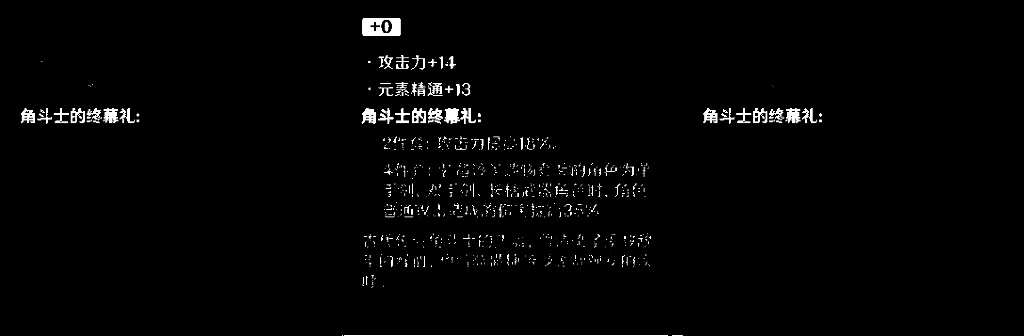

<ROI (1473,  821) (1735,  865)>

In [ ]:
from detector.util import moph


gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

def find_artifact_set_name_roi(screen: np.array, artifact_panel_roi: ROI):
  '''
  screen: colored image
  '''
  panel = artifact_panel_roi.clip_image(screen)
  hsv = cv.cvtColor(panel, cv.COLOR_BGR2HSV)

  h = cv.inRange(hsv[...,0], 50, 58)
  s = cv.inRange(hsv[...,1], 30, 255)
  mask = s & h
  cv.imshow(np.hstack([h, s, mask]))

  mask = moph(mask, kernel_size=[3, 3], n_iter=5)

  contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  def bound_rect_area(c):
    _, _, w, h = cv.boundingRect(c)
    return w * h
  contours = [c for c in contours if bound_rect_area(c) > 500]
  text_contour = min(contours, key=lambda i: cv.boundingRect(i)[1])
  x, y, w, h = cv.boundingRect(text_contour)

  return ROI(x, y, x+w, y+h).translate(*artifact_panel_roi.p1)

find_artifact_set_name_roi(frame, allroi.lower)

In [ ]:
slice = set_roi.clip_image(frame)
cv.imshow(slice)

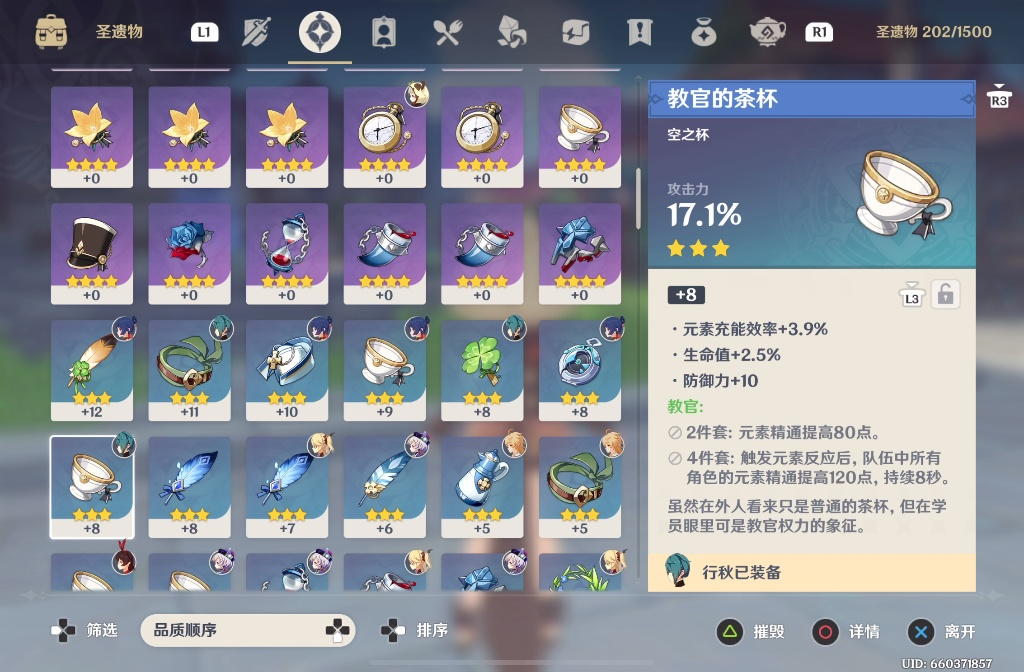

In [6]:
reader = scanner.FrameReader('/Users/olir/Desktop/Untitled.mov', time=7.4341)
image = reader.next()
cv.imshow(image)

In [ ]:
import sketch

sketch.SketchRecorder('/sketch/')